In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [3]:
df = pd.read_csv(r".\vaccination-covid\src\data\masterlist.csv", delimiter=";")
df

C:\Users\Louis\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date_reference,semaine_injection,region_residence,libelle_region,departement_residence,libelle_departement,population_insee,classe_age,libelle_classe_age,type_vaccin,...,taux_cumu_1_inj,taux_cumu_termine,date,effectif_rappel,effectif_cumu_rappel,effectif_rappel_parmi_eligible,effectif_eligible_au_rappel,taux_rappel,taux_cumu_rappel,taux_cumu_rappeleli
0,2022-01-09,2020-52,1,Guadeloupe,Tout département,FRANCE,50545.0,00-11,de 0 à 11 ans,COMIRNATY Pfizer-BioNTech,...,NaN,NaN,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-09,2020-52,1,Guadeloupe,Tout département,FRANCE,50545.0,00-11,de 0 à 11 ans,COVID-19 Vaccine Moderna,...,NaN,NaN,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-09,2020-52,1,Guadeloupe,Tout département,FRANCE,50545.0,00-11,de 0 à 11 ans,VAXZEVRIA AstraZeneca,...,NaN,NaN,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-09,2020-52,1,Guadeloupe,Tout département,FRANCE,50545.0,00-11,de 0 à 11 ans,COVID-19 Vaccine Janssen,...,NaN,NaN,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-09,2020-52,1,Guadeloupe,Tout département,FRANCE,50545.0,00-11,de 0 à 11 ans,COMIRNATY Pfizer-BioNTech pédiatrique,...,NaN,NaN,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368924,2022-01-16,2022-02,Toute région,FRANCE,Tout département,FRANCE,67287193.0,TOUT_AGE,Tout âge,VAXZEVRIA AstraZeneca,...,0.065,0.054,2022-01-16,NaN,NaN,NaN,4249640.0,NaN,NaN,NaN
368925,2022-01-16,2022-02,Toute région,FRANCE,Tout département,FRANCE,67287193.0,TOUT_AGE,Tout âge,COVID-19 Vaccine Janssen,...,0.016,0.016,2022-01-16,NaN,NaN,NaN,1043810.0,NaN,NaN,NaN
368926,2022-01-16,2022-02,Toute région,FRANCE,Tout département,FRANCE,67287193.0,TOUT_AGE,Tout âge,COMIRNATY Pfizer-BioNTech pédiatrique,...,0.002,0.000,2022-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368927,2022-01-16,2022-02,Toute région,FRANCE,Tout département,FRANCE,67287193.0,TOUT_AGE,Tout âge,Tout vaccin,...,0.796,0.777,2022-01-16,3225750.0,31617730.0,31160710.0,43673790.0,0.048,0.47,0.713


In [4]:
df.shape

(368929, 26)

In [10]:
df.columns

Index(['date_reference', 'semaine_injection', 'region_residence',
       'libelle_region', 'departement_residence', 'libelle_departement',
       'population_insee', 'classe_age', 'libelle_classe_age', 'type_vaccin',
       'effectif_1_inj', 'effectif_termine', 'effectif_cumu_1_inj',
       'effectif_cumu_termine', 'taux_1_inj', 'taux_termine',
       'taux_cumu_1_inj', 'taux_cumu_termine', 'date', 'effectif_rappel',
       'effectif_cumu_rappel', 'effectif_rappel_parmi_eligible',
       'effectif_eligible_au_rappel', 'taux_rappel', 'taux_cumu_rappel',
       'taux_cumu_rappeleli'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368929 entries, 0 to 368928
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date_reference                  368929 non-null  object 
 1   semaine_injection               368928 non-null  object 
 2   region_residence                368928 non-null  object 
 3   libelle_region                  362880 non-null  object 
 4   departement_residence           368928 non-null  object 
 5   libelle_departement             365904 non-null  object 
 6   population_insee                362880 non-null  float64
 7   classe_age                      368928 non-null  object 
 8   libelle_classe_age              368928 non-null  object 
 9   type_vaccin                     368928 non-null  object 
 10  effectif_1_inj                  170557 non-null  float64
 11  effectif_termine                162210 non-null  float64
 12  effectif_cumu_1_

In [13]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
date_reference,2022-01-09,2022-01-09,2022-01-09,2022-01-09,2022-01-09,2022-01-09,2022-01-09,2022-01-09,2022-01-09,2022-01-09
semaine_injection,2020-52,2020-52,2020-52,2020-52,2020-52,2020-52,2020-52,2020-52,2020-52,2020-52
region_residence,1,1,1,1,1,1,1,1,1,1
libelle_region,Guadeloupe,Guadeloupe,Guadeloupe,Guadeloupe,Guadeloupe,Guadeloupe,Guadeloupe,Guadeloupe,Guadeloupe,Guadeloupe
departement_residence,Tout département,Tout département,Tout département,Tout département,Tout département,Tout département,Tout département,Tout département,Tout département,Tout département
libelle_departement,FRANCE,FRANCE,FRANCE,FRANCE,FRANCE,FRANCE,FRANCE,FRANCE,FRANCE,FRANCE
population_insee,50545.0,50545.0,50545.0,50545.0,50545.0,50545.0,31882.0,31882.0,31882.0,31882.0
classe_age,00-11,00-11,00-11,00-11,00-11,00-11,12-17,12-17,12-17,12-17
libelle_classe_age,de 0 à 11 ans,de 0 à 11 ans,de 0 à 11 ans,de 0 à 11 ans,de 0 à 11 ans,de 0 à 11 ans,de 12 à 17 ans,de 12 à 17 ans,de 12 à 17 ans,de 12 à 17 ans
type_vaccin,COMIRNATY Pfizer-BioNTech,COVID-19 Vaccine Moderna,VAXZEVRIA AstraZeneca,COVID-19 Vaccine Janssen,COMIRNATY Pfizer-BioNTech pédiatrique,Tout vaccin,COMIRNATY Pfizer-BioNTech,COVID-19 Vaccine Moderna,VAXZEVRIA AstraZeneca,COVID-19 Vaccine Janssen


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population_insee,362880.0,373817.738889,2.272600e+06,2517.000,40108.500,77802.500,204474.750,6.728719e+07
effectif_1_inj,170557.0,3768.615653,3.493032e+04,10.000,80.000,310.000,1370.000,2.804760e+06
effectif_termine,162210.0,3865.105049,3.680896e+04,10.000,80.000,310.000,1420.000,3.179680e+06
effectif_cumu_1_inj,235771.0,88276.694080,8.253663e+05,10.000,720.000,6420.000,35810.000,5.356999e+07
effectif_cumu_termine,219338.0,80784.475376,7.850069e+05,10.000,430.000,4880.000,30990.000,5.225311e+07
taux_1_inj,166595.0,0.009862,1.674884e-02,0.000,0.001,0.003,0.010,1.610000e-01
taux_termine,158434.0,0.010121,1.682543e-02,0.000,0.001,0.003,0.010,1.300000e-01
taux_cumu_1_inj,231167.0,0.230360,3.045572e-01,0.000,0.009,0.059,0.450,1.000000e+00
taux_cumu_termine,214964.0,0.211592,2.956774e-01,0.000,0.004,0.048,0.362,1.000000e+00
effectif_rappel,17053.0,11124.443206,8.576251e+04,10.000,230.000,1380.000,5090.000,4.713440e+06


In [22]:
Q1 = df["taux_cumu_1_inj"].quantile(0.25)
Q3 = df["taux_cumu_1_inj"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

IQRmin = Q1 - 1.5 *  IQR
print(IQRmin)
IQRmax = Q3 + 1.5 * IQR
print(IQRmax)

1290.0
-1855.0
3305.0


In [21]:
print(df < (Q1 - 1.5 *  IQR)) | (df > (Q3 + 1.5 * IQR))

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [19]:
print("Highest allowed",df['effectif_1_inj'].mean() + 3*df['effectif_1_inj'].std())
print("Lowest allowed",df['effectif_1_inj'].mean() - 3*df['effectif_1_inj'].std())


Highest allowed 108559.58208959262
Lowest allowed -101022.35078275678


In [14]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Louis\AppData\Local\Temp\ipykernel_108732\472743239.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [27]:
min, max = df["taux_cumu_1_inj"].quantile([Q1, Q3])
min, max

df[df["taux_cumu_1_inj"] < min]

ValueError: percentiles should all be in the interval [0, 1]. Try [ 0.8 13.7] instead.

In [12]:
df["taux_rappel"].shape

(368929,)

In [15]:
df_out["taux_rappel"].shape

(276386,)

In [17]:
x = pd.isnull(df["taux_cumu_rappeleli"]).sum().sum()
print(x)

352566


In [59]:
y = df.median(axis = 0)
print(y)

population_insee                  77802.500
effectif_1_inj                      310.000
effectif_termine                    310.000
effectif_cumu_1_inj                6420.000
effectif_cumu_termine              4880.000
taux_1_inj                            0.003
taux_termine                          0.003
taux_cumu_1_inj                       0.059
taux_cumu_termine                     0.048
effectif_rappel                    1380.000
effectif_cumu_rappel               4190.000
effectif_rappel_parmi_eligible     6320.000
effectif_eligible_au_rappel        7540.000
taux_rappel                           0.014
taux_cumu_rappel                      0.040
taux_cumu_rappeleli                   0.116
dtype: float64


C:\Users\Louis\AppData\Local\Temp\ipykernel_107896\2986268782.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y = df.median(axis = 0)


In [10]:
print(df["effectif_1_inj"].max)

<bound method NDFrame._add_numeric_operations.<locals>.max of 0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
368924        10.0
368925       100.0
368926     57550.0
368927    262930.0
368928         NaN
Name: effectif_1_inj, Length: 368929, dtype: float64>


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
368924      NaN
368925      NaN
368926      NaN
368927    0.048
368928      NaN
Name: taux_rappel, Length: 368929, dtype: float64


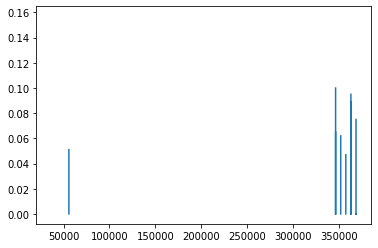

In [9]:
taux_rappel = df["taux_rappel"]

print(df["taux_rappel"])

fig, x = plt.subplots()
x.plot(taux_rappel)
plt.show()


In [22]:
#df.boxplot(column="effectif_termine")

bp = df.boxplot(column='effectif_1_inj')

KeyError: "None of [Float64Index([     nan,      nan,      nan,      nan,      nan,      nan,\n                   nan,      nan,      nan,      nan,\n              ...\n                   nan,      nan,   9400.0, 149610.0,  55660.0,     10.0,\n                 100.0,  57550.0, 262930.0,      nan],\n             dtype='float64', length=368929)] are in the [columns]"

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


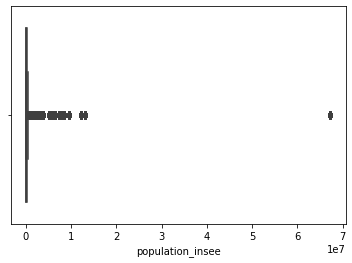

In [3]:
f, axes = plt.subplots()
sns.boxplot(df["population_insee"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


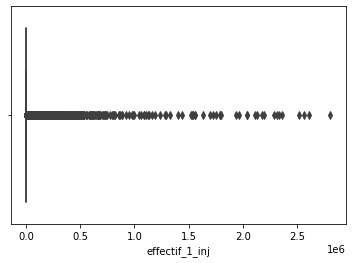

In [4]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_1_inj"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


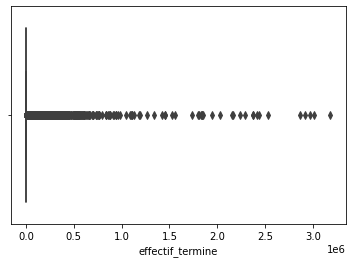

In [24]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_termine"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


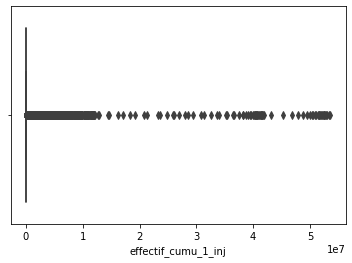

In [25]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_cumu_1_inj"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


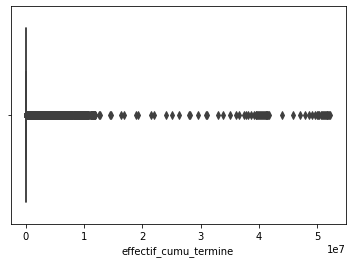

In [26]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_cumu_termine"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


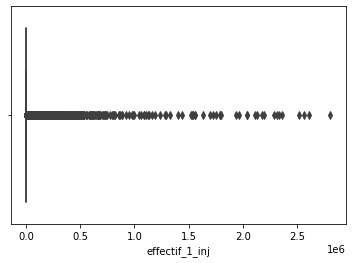

In [24]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_1_inj"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


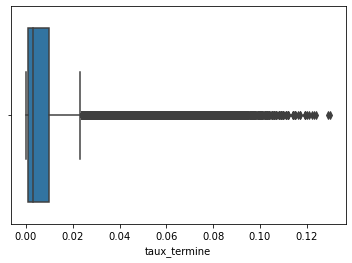

In [28]:
f, axes = plt.subplots()
sns.boxplot(df["taux_termine"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


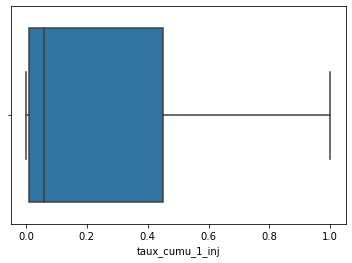

In [29]:
f, axes = plt.subplots()
sns.boxplot(df["taux_cumu_1_inj"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


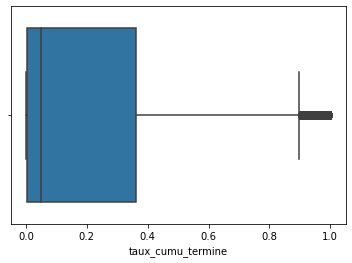

In [30]:
f, axes = plt.subplots()
sns.boxplot(df["taux_cumu_termine"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


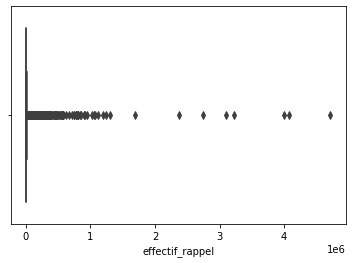

In [31]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_rappel"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


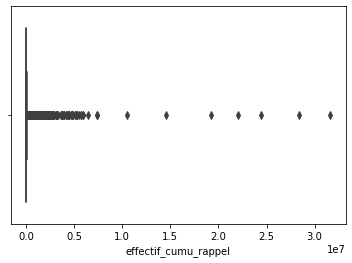

In [32]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_cumu_rappel"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


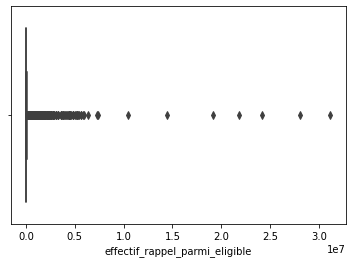

In [33]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_rappel_parmi_eligible"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


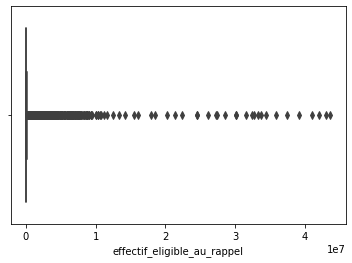

In [34]:
f, axes = plt.subplots()
sns.boxplot(df["effectif_eligible_au_rappel"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


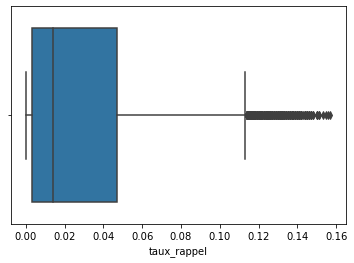

In [37]:
f, axes = plt.subplots()
sns.boxplot(df["taux_rappel"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


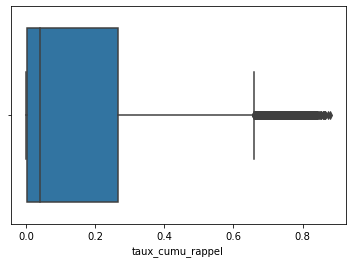

In [36]:
f, axes = plt.subplots()
sns.boxplot(df["taux_cumu_rappel"])
plt.show()

C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


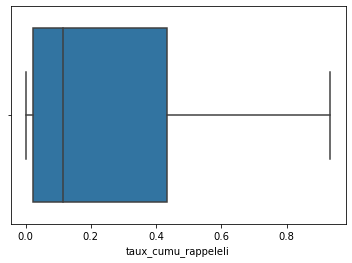

In [35]:
f, axes = plt.subplots()
sns.boxplot(df["taux_cumu_rappeleli"])
plt.show()

In [65]:
data = df[df["taux_cumu_rappel"] < 50000].mean()


C:\Users\Louis\AppData\Local\Temp\ipykernel_42992\1041533568.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = df[df["population_insee"] < 50000].mean()


In [81]:
test = df[df["taux_rappel"] < 0.11].mean()
print(test)

population_insee                  467045.876235
effectif_1_inj                      1593.210190
effectif_termine                    2725.788202
effectif_cumu_1_inj               364414.145257
effectif_cumu_termine             355022.401186
taux_1_inj                             0.003155
taux_termine                           0.005002
taux_cumu_1_inj                        0.835149
taux_cumu_termine                      0.815664
effectif_rappel                    10848.179965
effectif_cumu_rappel               64992.469121
effectif_rappel_parmi_eligible     69108.289753
effectif_eligible_au_rappel       208023.390111
taux_rappel                            0.025394
taux_cumu_rappel                       0.165192
taux_cumu_rappeleli                    0.246860
dtype: float64


C:\Users\Louis\AppData\Local\Temp\ipykernel_42992\4028226249.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test = df[df["taux_rappel"] < 0.11].mean()


C:\Users\Louis\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


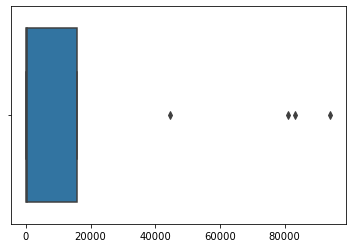

In [78]:
f, axes = plt.subplots()
sns.boxplot(test)
plt.show()

In [ ]:
#taux_rappel

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [28]:
index_list = []
for feature in ["taux_rappel", "taux_1_inj"]:
    index_list.extend(outliers(df, feature))

NameError: name 'outliers' is not defined